<a href="https://www.kaggle.com/code/salmaashraf12/amazon-consumer-behavior-py?scriptVersionId=146900615" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv


In [2]:
df=pd.read_csv('/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv')

In [3]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [5]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.age.value_counts()

age
23    123
34     48
24     40
25     36
45     34
21     30
26     27
32     19
22     17
27     17
36     16
35     15
37     14
46     12
40     12
31      9
28      9
29      9
30      8
56      8
33      7
18      7
47      6
54      6
43      6
50      5
44      5
20      5
16      5
38      4
41      4
19      4
39      4
17      4
42      4
48      3
60      3
67      2
15      2
57      2
53      2
64      1
58      1
49      1
63      1
52      1
3       1
55      1
62      1
12      1
Name: count, dtype: int64

/tmp/ipykernel_20/109297843.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde=True)


<Axes: xlabel='age', ylabel='Density'>

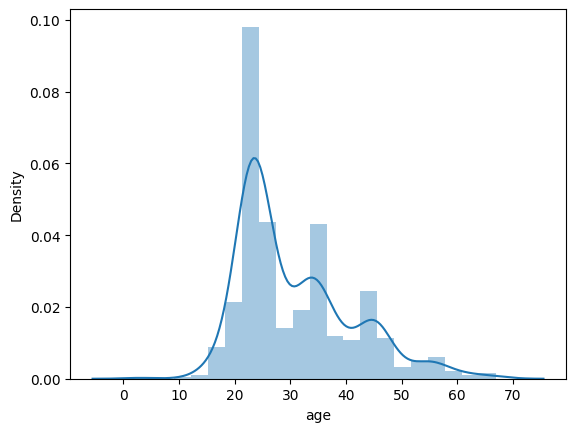

In [7]:
import seaborn as sns
sns.distplot(df['age'],kde=True)

In [8]:
(df.age<=3).sum()

1

In [9]:
df.loc[(df.age<=3)]

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
442,2023/06/09 10:28:57 AM GMT+5:30,3,Prefer not to say,Once a month,Home and Kitchen,No,Few times a week,categories,First page,3,...,Often,Yes,Occasionally,Sometimes,3,Sometimes,3,2,Competitive prices,Customer service responsiveness


/tmp/ipykernel_20/1214741518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Customer_Reviews_Importance'])


<Axes: xlabel='Customer_Reviews_Importance', ylabel='Density'>

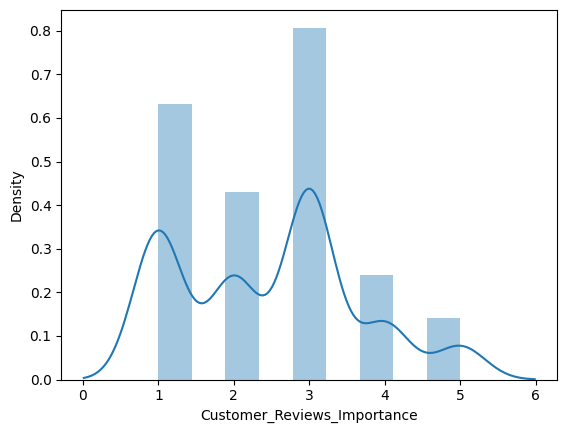

In [10]:
sns.distplot(df['Customer_Reviews_Importance'])

/tmp/ipykernel_20/1652250417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shopping_Satisfaction'])


<Axes: xlabel='Shopping_Satisfaction', ylabel='Density'>

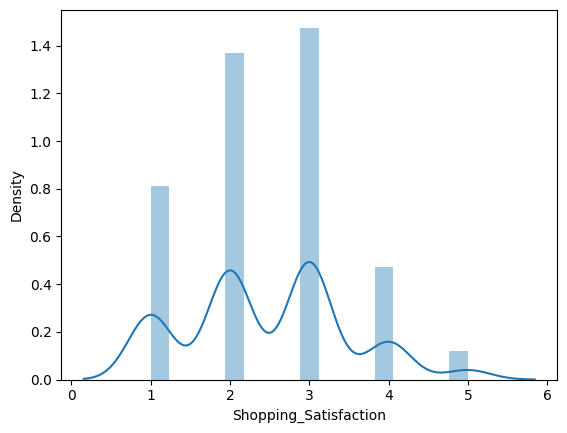

In [11]:
sns.distplot(df['Shopping_Satisfaction'])

In [12]:
df['Shopping_Satisfaction'].value_counts()

Shopping_Satisfaction
3    209
2    194
1    115
4     67
5     17
Name: count, dtype: int64

In [13]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [14]:
df['Rating_Accuracy '].value_counts()

Rating_Accuracy 
3    288
2    179
1     58
4     56
5     21
Name: count, dtype: int64

In [15]:
#remove space after and before name of each column
l=[]
l=df.columns.tolist()
l

['Timestamp',
 'age',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Customer_Reviews_Importance',
 'Add_to_Cart_Browsing',
 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Personalized_Recommendation_Frequency ',
 'Recommendation_Helpfulness',
 'Rating_Accuracy ',
 'Shopping_Satisfaction',
 'Service_Appreciation',
 'Improvement_Areas']

In [16]:
l2=[]
for i in l:
    l2.append(i.strip())
    

In [17]:
df.columns=l2

In [18]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency', 'Recommendation_Helpfulness',
       'Rating_Accuracy', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Timestamp                              602 non-null    object
 1   age                                    602 non-null    int64 
 2   Gender                                 602 non-null    object
 3   Purchase_Frequency                     602 non-null    object
 4   Purchase_Categories                    602 non-null    object
 5   Personalized_Recommendation_Frequency  602 non-null    object
 6   Browsing_Frequency                     602 non-null    object
 7   Product_Search_Method                  600 non-null    object
 8   Search_Result_Exploration              602 non-null    object
 9   Customer_Reviews_Importance            602 non-null    int64 
 10  Add_to_Cart_Browsing                   602 non-null    object
 11  Cart_Completion_Fre

In [20]:
df.tail()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy
601,2023/06/16 9:16:05 AM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Multiple times a day,Keyword,Multiple pages,3,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,3,Product recommendations,Product quality and accuracy


In [21]:
df['Improvement_Areas'].value_counts()

Improvement_Areas
Customer service responsiveness                                                   217
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     79
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

In [22]:
df.loc[df['Improvement_Areas']=='.']

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
22,2023/06/04 8:54:36 PM GMT+5:30,21,Male,Less than once a month,others,No,Few times a week,others,Multiple pages,1,...,Never,No,Never,Sometimes,3,Sometimes,3,3,.,.


In [23]:
df.drop(index=22,inplace=True)

In [24]:
df['Purchase_Categories'].value_counts()

Purchase_Categories
Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                106
others                                                                                               47
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     24
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others

In [25]:
df['Gender'].value_counts()

Gender
Female               352
Male                 141
Prefer not to say     89
Others                19
Name: count, dtype: int64

In [26]:
df['Service_Appreciation'].value_counts()

Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
Customer service                         1
Customer service                         1
Quick delivery                           1
All the above                            1
Name: count, dtype: int64

In [27]:
df['Service_Appreciation']=df['Service_Appreciation'].str.strip()

In [28]:
df['Service_Appreciation'].value_counts()

Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
Customer service                         2
Quick delivery                           1
All the above                            1
Name: count, dtype: int64

In [29]:
df['Purchase_Categories'].value_counts()

Purchase_Categories
Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                106
others                                                                                               47
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     24
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others

In [30]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency', 'Recommendation_Helpfulness',
       'Rating_Accuracy', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [31]:
df['Product_Search_Method'].value_counts()

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         35
Name: count, dtype: int64

In [32]:
df['Recommendation_Helpfulness'].value_counts()

Recommendation_Helpfulness
Sometimes    272
No           172
Yes          157
Name: count, dtype: int64

In [33]:
df['Browsing_Frequency'].value_counts()

Browsing_Frequency
Few times a week        248
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: count, dtype: int64

In [34]:
df['Search_Result_Exploration'].value_counts()

Search_Result_Exploration
Multiple pages    441
First page        160
Name: count, dtype: int64

In [35]:
df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Maybe    248
Yes      215
No       138
Name: count, dtype: int64

In [36]:
df['Cart_Abandonment_Factors'].value_counts()

Cart_Abandonment_Factors
Found a better price elsewhere                255
Changed my mind or no longer need the item    241
High shipping costs                            70
others                                         35
Name: count, dtype: int64

In [37]:
df['Recommendation_Helpfulness'].value_counts()

Recommendation_Helpfulness
Sometimes    272
No           172
Yes          157
Name: count, dtype: int64

In [38]:
df['Review_Reliability'].value_counts()

Review_Reliability
Moderately      199
Occasionally    190
Heavily         149
Rarely           41
Never            22
Name: count, dtype: int64

In [39]:
df['Customer_Reviews_Importance'].value_counts()

Customer_Reviews_Importance
3    216
1    168
2    115
4     64
5     38
Name: count, dtype: int64

In [40]:
def datCnv(src):
    return pd.to_datetime(src)
df['Timestamp']=df.Timestamp.apply(datCnv)

In [41]:
df['Timestamp']

0     2023-06-04 13:28:19-05:30
1     2023-06-04 14:30:44-05:30
2     2023-06-04 17:04:56-05:30
3     2023-06-04 17:13:00-05:30
4     2023-06-04 17:28:06-05:30
                 ...           
597   2023-06-12 16:02:02-05:30
598   2023-06-12 16:02:53-05:30
599   2023-06-12 16:03:59-05:30
600   2023-06-12 21:57:20-05:30
601   2023-06-16 09:16:05-05:30
Name: Timestamp, Length: 601, dtype: datetime64[ns, UTC-05:30]

In [42]:
df['month'] = df['Timestamp'].dt.month

In [43]:
df['month'].value_counts()

month
6    601
Name: count, dtype: int64

In [44]:
df['day']=df['Timestamp'].dt.day   # day of month

In [45]:
df['day_in_week']=df['Timestamp'].dt.dayofweek # day of week 
df['day_in_week'].dtype
df['day_in_week']=df['day_in_week'].map({0:'sat',
                            1:'sun',
                            2:'mon',
                            3:'tues',
                            4:'wed',
                            5:'thurs',
                            6:'fri'})


In [46]:
df['day'].value_counts()

day
8     119
7     112
6      87
9      81
5      62
11     61
4      38
12     36
10      4
16      1
Name: count, dtype: int64

In [47]:
df['day_in_week'].value_counts()

day_in_week
tues     119
mon      112
fri       99
sat       98
sun       87
wed       82
thurs      4
Name: count, dtype: int64

In [48]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,month,day,day_in_week
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,6,4,fri
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,6,4,fri
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,No,4,No,3,3,Competitive prices,Product quality and accuracy,6,4,fri
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,6,4,fri
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,6,4,fri


In [49]:
df['month'].value_counts()

month
6    601
Name: count, dtype: int64

In [50]:
df['age'].value_counts()

age
23    123
34     48
24     40
25     36
45     34
21     29
26     27
32     19
22     17
27     17
36     16
35     15
37     14
46     12
40     12
31      9
28      9
29      9
30      8
56      8
33      7
18      7
47      6
54      6
43      6
50      5
44      5
20      5
16      5
38      4
41      4
19      4
39      4
17      4
42      4
48      3
60      3
67      2
15      2
57      2
53      2
64      1
58      1
49      1
63      1
52      1
3       1
55      1
62      1
12      1
Name: count, dtype: int64

In [51]:
df.age.max()

67